# **Discretization**

## What is Discretization

Discretization is the process of transforming continuous data into discrete data. 

## Examples

Discretization can be applied to:

- Categorical data
- Numerical data


In [9]:
import pandas as sns
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer


In [10]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
# impute missing values 
df["age"].fillna(df["age"].median(), inplace=True)
df["fare"].fillna(df["fare"].median(), inplace=True)

<Axes: xlabel='age', ylabel='Count'>

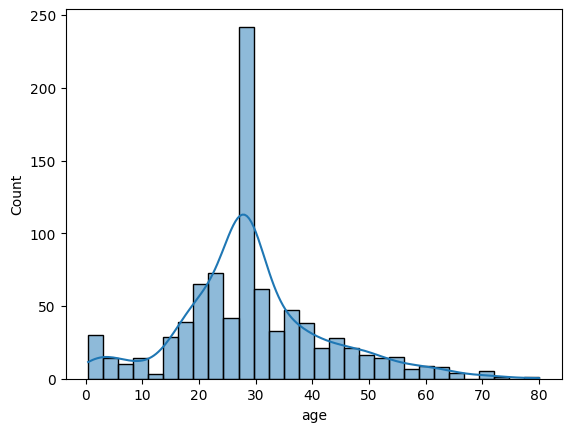

In [13]:
sns.histplot(data=df, x='age',kde=True)

In [41]:
# age discretization 
age_discretizer = KBinsDiscretizer(n_bins=3, encode="ordinal", strategy="uniform").fit(df[["age"]])
df['age_bin'] = age_discretizer.transform(df[['age']])
df.head()


c:\Users\HP\miniconda3\envs\machine_learning_env\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<Axes: xlabel='age', ylabel='Count'>

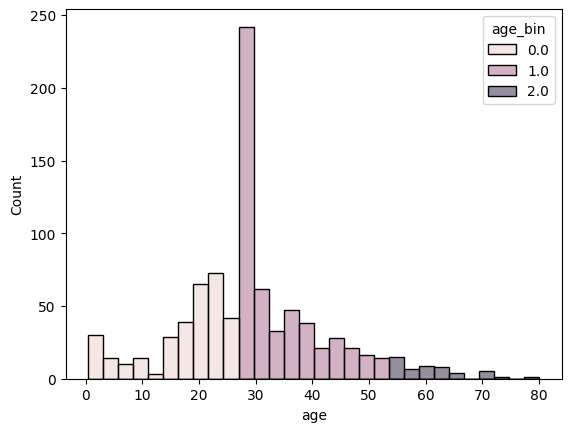

In [42]:
sns.histplot(data=df, x='age',hue='age_bin')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin_2,age_bin_3
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,young_adult,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,adult,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,young_adult,young_adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,adult,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0,adult,adult


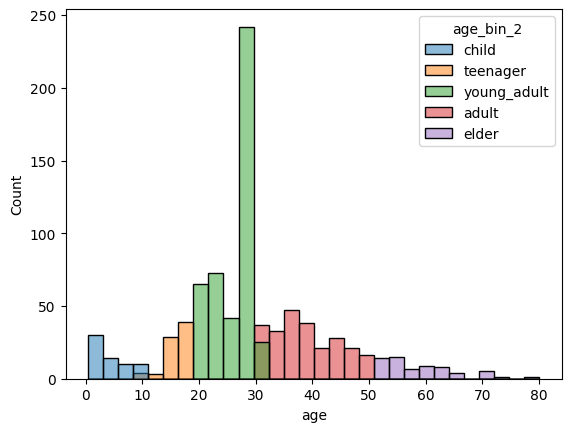

In [53]:
import pandas as pd  # Import the pandas module

# pandas method for manual binning
bins=[0,10,18,30,50,80]
labels=['child', 'teenage', 'young_adult','adult','elder']
df['age_bin_3'] = pd.cut(df['age'], bins=bins ,labels=labels)
sns.histplot(data=df, x='age',hue='age_bin_2')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin,age_bin_2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,young_adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,young_adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0,adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0,adult


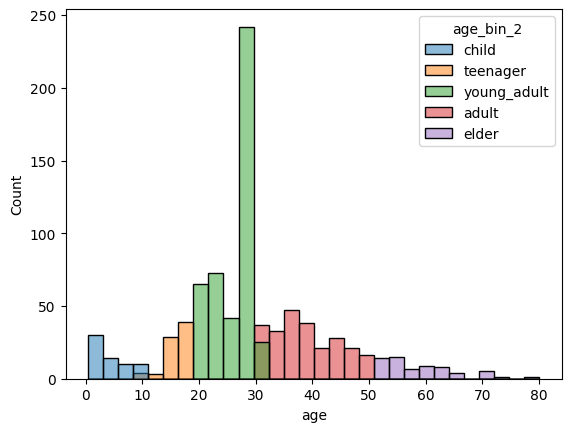

In [48]:
df['age_bin_2'] = pd.cut(df['age'], bins=[0,10,18,30,50,80],
                        labels=['child', 'teenager','young_adult', 'adult', 'elder'])
sns.histplot(data=df, x='age',hue='age_bin_2')
df.head()